In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

#from scipy import misc
import imageio
import glob
from PIL import Image

from os import listdir
from os.path import isfile, join

import re
import pickle
import tqdm

from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
def get_patches_custom(img_arr, size=256, stride=256):
    """
    Takes single image or array of images and returns
    crops using sliding window method.
    If stride < size it will do overlapping.
    """   
     
    # check size and stride
    if size % stride != 0:
        raise ValueError("size % stride must be equal 0")

    patches_list = []
    overlapping = 0
    if stride != size:
        overlapping = (size // stride) - 1

    if img_arr.ndim == 3:
        i_max = img_arr.shape[0] // stride - overlapping
        j_max = img_arr.shape[1] // stride - overlapping
        for i in range(i_max):
            for j in range(j_max):
                patches_list.append(
                    img_arr[
                        i * stride : i * stride + size,
                        j * stride : j * stride + size
                    ]
                )
                #print(i * stride,i * stride + size)
                #print(j * stride,j * stride + size)
                #print('ok')

    elif img_arr.ndim == 4:
        i_max = img_arr.shape[1] // stride - overlapping
        for im in img_arr:
            for i in range(i_max):
                for j in range(i_max):
                    patches_list.append(
                        im[
                            i * stride : i * stride + size,
                            j * stride : j * stride + size,
                        ]
                    )

    else:
        raise ValueError("img_arr.ndim must be equal 3 or 4")

    return np.stack(patches_list)

In [ ]:
# Если надо переделать маски на черно-белые без зеленого

#path_mask = "/Users/anastasia/Desktop/Нейросети/Project/train_val_masks_3cl/"
#filename_mask = [f for f in listdir(path_mask) if isfile(join(path_mask, f)) and re.search('\d',f)]
#filename_mask.sort()

#for n in range(0,len(filename_mask)):
#    print(n)
#    mask = Image.open(path_mask + "/" + filename_mask[n])
#    for i in range(mask.size[0]):
#        for j in range(mask.size[1]):
#            a = mask.getpixel((i, j))
#            if a == (0, 255, 0) or a == (255, 0, 0):
#                mask.putpixel((i, j), (255, 255, 255))
#    mask.save(filename_mask[n]) 

In [ ]:
def create_dataset(path_img, path_mask, crop_size):

    filename_img = [f for f in listdir(path_img) if isfile(join(path_img, f)) and re.search('\d',f)]
    filename_img.sort()
    filename_mask = [f for f in listdir(path_mask) if isfile(join(path_mask, f)) and re.search('\d',f)]
    filename_mask.sort()
    
    w_size = np.arange(0,len(filename_img))
    h_size = w_size.copy()
    n = 0
    x_crops_image = np.zeros((0, crop_size, crop_size, 3))
    x_crops_mask = np.zeros((0, crop_size, crop_size, 3))
    
    for n in range(0,len(filename_img)):
        print(n)
        print(filename_img[n])
        print(filename_mask[n])
        
        image = imageio.imread(path_img + "/" + filename_img[n])[:,:,0:3]
        print(image.shape)
        w_size[n] = image.shape[0]
        h_size[n] = image.shape[1]
        mask = imageio.imread(path_mask + "/" + filename_mask[n])[:,:,0:3]
        print(mask.shape)
        

        if  w_size[n] > h_size[n]:
            image = np.swapaxes(image,0,1)
            tmp = w_size[n]
            w_size[n] = h_size[n]
            h_size[n] = tmp
            
        x_crops = get_patches_custom(
            img_arr=image.astype(int), # required - array of images to be cropped
            size=crop_size, # default is 256
            stride=crop_size) # default is 256
        x_crops.astype(np.uint8)
        
        print(x_crops.shape)
        x_crops_image = np.append(x_crops_image, x_crops, axis=0)
        del(x_crops)
        
        x_crops = get_patches_custom(
            img_arr=mask.astype(int), # required - array of images to be cropped
            size=crop_size, # default is 256
            stride=crop_size) # default is 256
        x_crops.astype(np.uint8)
        
        print(x_crops.shape)
        x_crops_mask = np.append(x_crops_mask, x_crops, axis=0)
        del(x_crops)
        
    len_dataset = x_crops_image.shape[0]
    y_crops = np.zeros((len_dataset, 1))
            

    x_final = np.squeeze(x_crops_image)
    x_final_mask = np.squeeze(x_crops_mask)
    
    return x_final.astype(np.uint8), x_final_mask.astype(np.uint8)

In [ ]:
path_img = '/gdrive/My Drive/Segmentation_project/train_val_images/'
path_mask = '/gdrive/My Drive/Segmentation_project/train_val_masks_2cl/'

#path_img = "/Users/anastasia/Desktop/Нейросети/Project/train_val_images/"
#path_mask = "/Users/anastasia/Desktop/Нейросети/Project/train_val_masks/"

crop_size = 256

imgs_cropped, masks_cropped = create_dataset(path_img, path_mask, crop_size)


1
/gdrive/My Drive/Segmentation_project/train_val_masks_2cl/
1
1
0
EVBH4-CH1B-1_0.20.tiff
EVBH4-CH1B-1_0.20.png
(7163, 9960, 3)
(7163, 9960, 3)
(1026, 256, 256, 3)
(1026, 256, 256, 3)


In [ ]:
def plot_random_Images(images_arr, mask_arr):
    fig, axes = plt.subplots(2, 10, figsize=(20,5))
    axes = axes.flatten()
    rand_num = np.random.randint(0, len(images_arr), size=10)
    
    print(rand_num)
    
    for k in range(0,10):
        axes[k].imshow(images_arr[rand_num[k]])
        axes[k+10].imshow(mask_arr[rand_num[k]])
        
    plt.tight_layout()
    plt.show()

[ 662  523  929  682  155  238  846  343  628 1006]


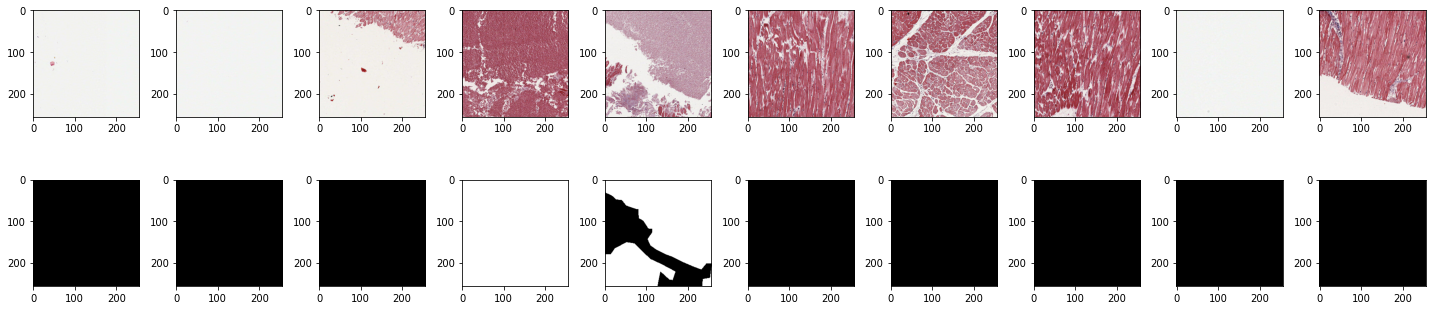

In [ ]:
plot_random_Images(imgs_cropped, masks_cropped)

In [ ]:
x_images = torch.from_numpy(imgs_cropped/255)
print(x_images.shape)
x_images = torch.transpose(x_images, 1, 3)
x_images = torch.transpose(x_images, 2, 3)
print(x_images.shape)
y_labels = torch.from_numpy(masks_cropped/255)
print(y_labels.shape)
y_labels = y_labels[:,:,:,2].unsqueeze(1)
print(y_labels.shape)

x_images_new = x_images.numpy()
print(x_images.shape)
y_labels_new = y_labels.numpy()
print(y_labels.shape)

torch.Size([1026, 256, 256, 3])
torch.Size([1026, 3, 256, 256])
torch.Size([1026, 256, 256, 3])
torch.Size([1026, 1, 256, 256])
torch.Size([1026, 3, 256, 256])
torch.Size([1026, 1, 256, 256])


In [ ]:
def gen_images():
    for i in range(100000):
        yield i
i_name_images = gen_images()

In [ ]:
for cropping in tqdm.tqdm(x_images_new):
    with open(f'/gdrive/My Drive/Segmentation_project/train_val_images_cropped/image_{next(i_name_images)}', 'wb+') as f:
        pickle.dump(cropping, f)

100%|██████████| 1026/1026 [00:25<00:00, 39.94it/s]


In [ ]:
def gen_masks():
    for i in range(100000):
        yield i
i_name_masks = gen_masks()

In [ ]:
for cropping in tqdm.tqdm(y_labels_new):
    with open(f'/gdrive/My Drive/Segmentation_project/train_val_masks_2cl_cropped/mask_{next(i_name_masks)}', 'wb+') as f:
        pickle.dump(cropping, f)

100%|██████████| 1026/1026 [00:12<00:00, 85.25it/s]
